# ChestX-Ray data

In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import models.training as tr
import models.reportnet as M
import data.preprocessing as pr
from torchvision import transforms
from matplotlib import pyplot as plt

batch_size = 4
# Load data
uids = np.unique(pr.projections.index)
# Image preprocessing 
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((2048, 2048), antialias=False)
])
train_data, train_loader, val_data, val_loader, test_data, test_loader = pr.create_dataloaders(uids, pr.IMAGES_PATH, batch_size=batch_size, transform=transform)

[nltk_data] Downloading package punkt to /home/mpizarro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/home/mpizarro/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# ReportNet (our model from scratch)

## Training

In [2]:
# Define the parameters
d_model = 256 # how many features do we have for each token --> embeding dimension
nhead = 2
num_layers = 6
dropout = 0.1
max_len = 30

model = M.ReportNet(pr.tokenizer.vocab_size, d_model, max_len, dropout)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=3e-4)

t_loss, v_loss = tr.fit(model, optimizer, criterion, train_loader, val_loader, epochs=2, pad_idx=pr.tokenizer.pad_token)

Epoch 1
Training loss: 1.6486 || Validation loss: 1.3464
Epoch 2
Training loss: 1.0967 || Validation loss: 1.2501


TypeError: Module._save_to_state_dict() missing 2 required positional arguments: 'prefix' and 'keep_vars'

In [4]:
torch.save(model.state_dict(), 'reportnet.pth')

## Testing

In [3]:
print(f"Test loss: {tr.validation_loop(model, criterion, test_loader)}")

Test loss: 1.4692798309665631


## Predict



<SOS> The heart is normal in size and contour . There is a focal area of scarring or XXXX atelectasis identified in the lingula . The lungs are otherwise <EOS>
<SOS> post post post post post post post post post post post post post post post post post post post post post post post post post post post post post post


<SOS> No findings . <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<SOS> post post post post post post post post post post post post post post post post post post post post post post post post post post post post post post


<SOS> No findings . <EOS> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>
<SOS> post post post post post post post post post post post post post post post post post post post post post post post post post post post post post post


<SOS> The he

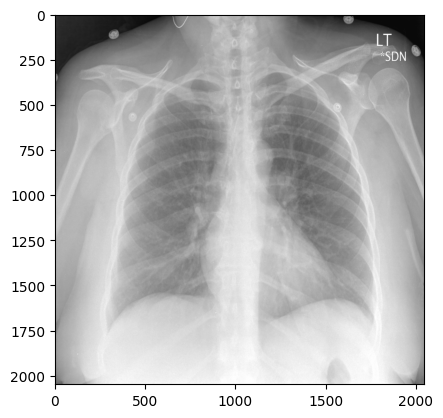

In [11]:
bimg, breport = next(iter(train_loader))

for img, report in zip(bimg, breport):
    print(f"\n")
    # Get the prediction
    result = tr.predict(model, img.unsqueeze(0), report.unsqueeze(0), max_length=30, SOS_token=pr.tokenizer.sos_token, EOS_token=pr.tokenizer.eos_token, PAD_token=pr.tokenizer.pad_token)
    pr.print_sequence(report.numpy(), pr.tokenizer.idx2word)
    pr.print_sequence(result, pr.tokenizer.idx2word)
    plt.imshow(img.permute(1, 2, 0))